In [1]:
#Blood cell subtype classification
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [2]:
#TRAIN AND TEST DATASET ADDRESS
DATASET=r"C:\Users\Hp\Desktop\project\blood group cells\dataset\TRAIN"
TEST_DATASET=r"C:\Users\Hp\Desktop\project\blood group cells\dataset\TEST"

#Categroized images
#4 types of subcells
CATEGORIES=["LEUKEMIA","SICKLE CELL ANAEMIA","MALARIA","MYELOMA"]

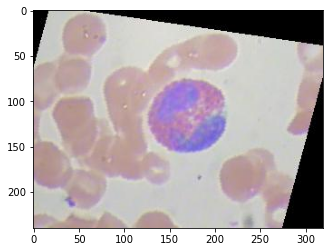

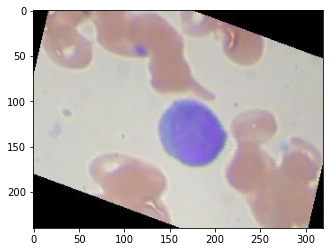

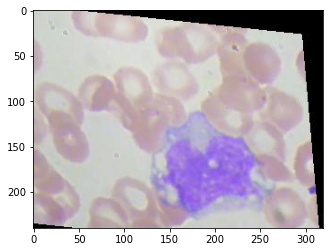

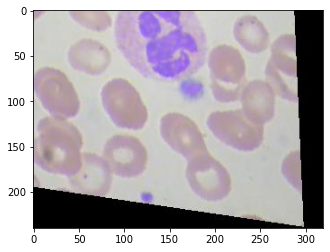

In [3]:
#reading original image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)            
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)

            #open cv read image in BGR format 
            #below we convert it to RGB format
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #print(img.shape)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

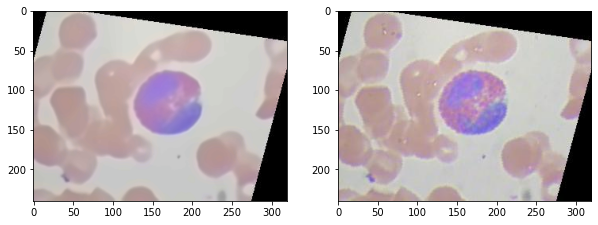

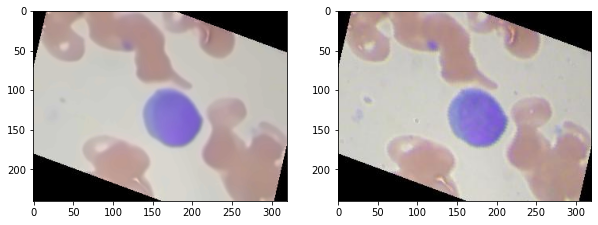

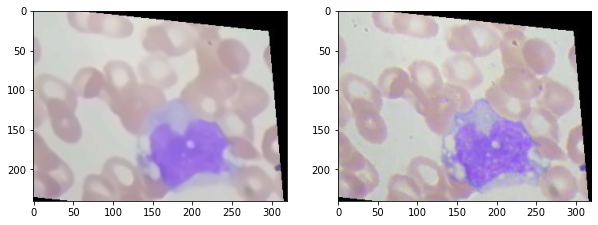

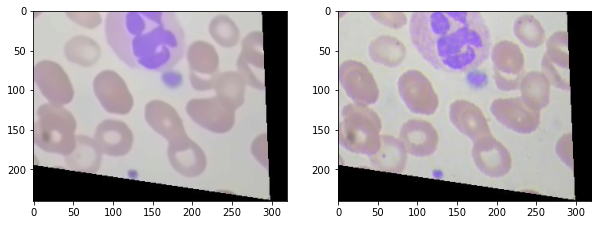

In [4]:
#reading image from directory
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            # 1 indicates read image in RGB scale
            # 0 indicates read image in grey scale
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            #image convert to smaller pixels 60*60
            #print(img.shape)
            plt.figure(figsize=(10,8))
            plt.subplot(121)
            plt.imshow(dst)
            plt.subplot(122)
            plt.imshow(img)
            plt.show()
            break
            
        #plotting single image from each folder

In [5]:
#make train data
train_data=[]

for category in CATEGORIES:
    
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))            
            train_data.append([img,label])

In [6]:
#make test data
test_data=[]

for category in CATEGORIES:
       
        #each cateogry into unique integer
        label=CATEGORIES.index(category)
        path=os.path.join(TEST_DATASET,category)
        
        for img_file in os.listdir(path):
            
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            #dst = cv.fastNlMeansDenoisingColored(img,None,5,10,7,21)
            img=cv.resize(img,(60,60))
            test_data.append([img,label])

In [7]:
#print total data in train and test
print(len(train_data))
print(len(test_data))

9957
2487


In [8]:
#shuffle the dataset fo good result

import random

random.shuffle(train_data)
random.shuffle(test_data)

In [9]:
#check the data
for lbl in train_data[:10]:
    print(lbl[1])

0
0
0
0
3
2
2
1
3
1


In [10]:
#lets seprate the feature and target variable
train_X=[]
train_y=[]

for features,label in train_data:
    train_X.append(features)
    train_y.append(label)

len(train_X),len(train_y)

(9957, 9957)

In [11]:
#lets seprate the feature and target variable
test_X=[]
test_y=[]

for features,label in test_data:
    test_X.append(features)
    test_y.append(label)

len(test_X),len(test_y)

(2487, 2487)

In [12]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B
train_X=np.array(train_X).reshape(-1,60,60,3)
train_X=train_X/255.0
train_X.shape

#we divide the np array by 255 to close all values to 0

(9957, 60, 60, 3)

In [13]:
#convert image array to numpy array
#-1 means same size
# 40*40 means height and width
# 3 for R+G+B

test_X=np.array(test_X).reshape(-1,60,60,3)
test_X=test_X/255.0
test_X.shape

#we divide the np array by 255 to close all values to 0

(2487, 60, 60, 3)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

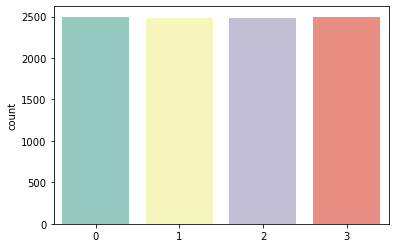

In [14]:
#count labels

sns.countplot(train_y,palette='Set3')
#we can see each categroy has equal data

In [15]:
#convert label into the one hot encode
from keras.utils import to_categorical
#train y
one_hot_train=to_categorical(train_y)
one_hot_train

Using TensorFlow backend.


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [16]:
#test_y
one_hot_test=to_categorical(test_y)
one_hot_test

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [17]:
#build the models
#import Keras libraries

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Activation

In [19]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(60,60,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.40))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
          
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       7

In [20]:
#we will choose adam optimizer
#we have 4 categories so loss function is categorical_crossentropy
#metrics accuracy
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
#lets split the 20% train dataset for validation 
model.fit(train_X,one_hot_train,epochs=50,batch_size=128,validation_split=0.2)


Epoch 1/50
63/63 [==============================] - 40s 609ms/step - loss: 1.3894 - accuracy: 0.2511 - val_loss: 1.3846 - val_accuracy: 0.2756
Epoch 2/50
63/63 [==============================] - 35s 562ms/step - loss: 1.3665 - accuracy: 0.3094 - val_loss: 1.2906 - val_accuracy: 0.3740
Epoch 3/50
63/63 [==============================] - 35s 562ms/step - loss: 1.1970 - accuracy: 0.4382 - val_loss: 1.1584 - val_accuracy: 0.4317
Epoch 4/50
63/63 [==============================] - 35s 551ms/step - loss: 1.0622 - accuracy: 0.5105 - val_loss: 0.9529 - val_accuracy: 0.5658
Epoch 5/50
63/63 [==============================] - 35s 553ms/step - loss: 0.9626 - accuracy: 0.5661 - val_loss: 0.9330 - val_accuracy: 0.5622
Epoch 6/50
63/63 [==============================] - 35s 552ms/step - loss: 0.8060 - accuracy: 0.6258 - val_loss: 0.6518 - val_accuracy: 0.7053
Epoch 7/50
63/63 [==============================] - 35s 557ms/step - loss: 0.6761 - accuracy: 0.6800 - val_loss: 0.6468 - val_accuracy: 0.6908

In [22]:
from keras.models import load_model 
model.save("blooddisease.h5") 

In [24]:
#model prediction

y_pred=model.predict_classes(test_X)
y_pred

C:\Users\Hp\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 3, 0, ..., 3, 0, 1], dtype=int64)

In [25]:
for i in range(10):
	print("Actual=%s, Predicted=%s" % (test_y[i], y_pred[i]))


Actual=1, Predicted=1
Actual=3, Predicted=3
Actual=0, Predicted=0
Actual=2, Predicted=3
Actual=1, Predicted=1
Actual=3, Predicted=3
Actual=3, Predicted=3
Actual=0, Predicted=3
Actual=1, Predicted=1
Actual=3, Predicted=3


In [26]:
#accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(test_y,y_pred)

0.8154402895054282

<AxesSubplot:>

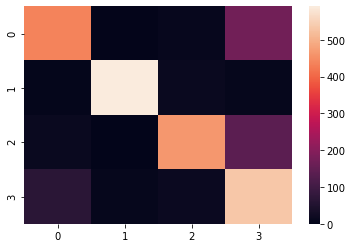

In [27]:
sns.heatmap(confusion_matrix(test_y,y_pred))